In [1]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
from skimage.morphology import binary_opening, binary_closing, disk
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

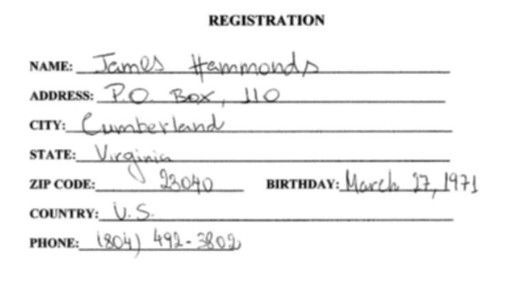

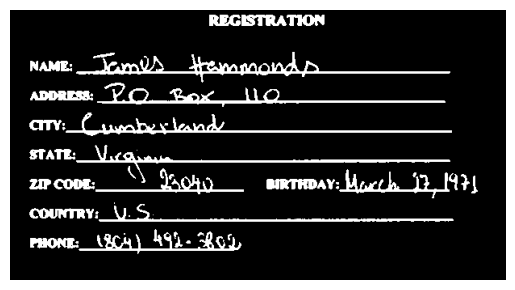

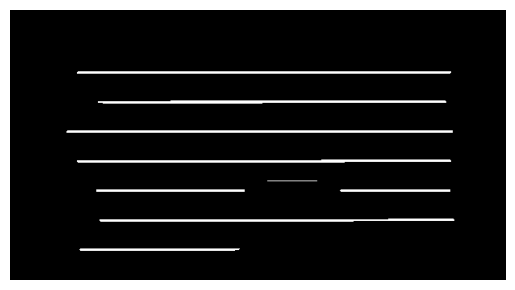

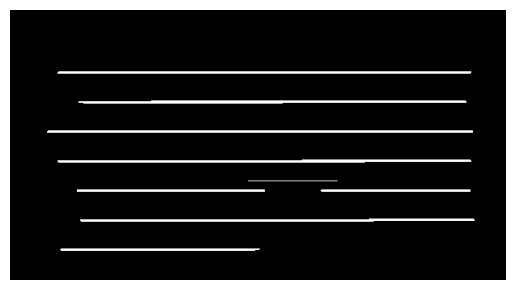

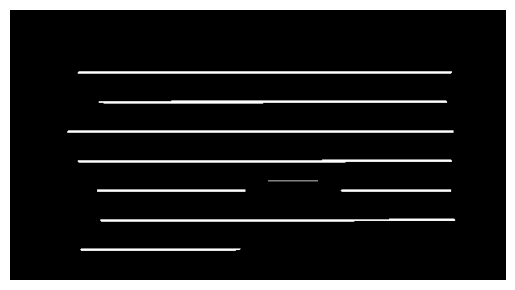

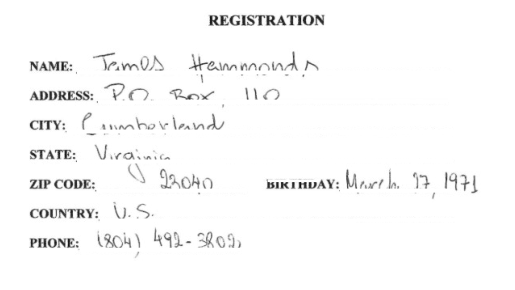

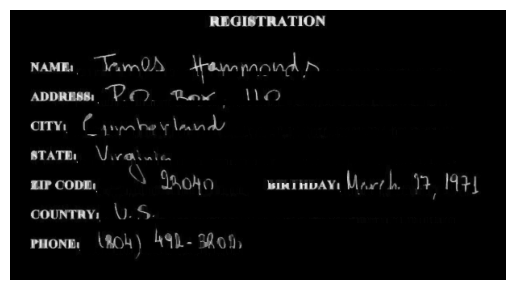

In [14]:

# Load the image
image = cv2.imread('document.jpg', 0)  # Load as grayscale

# Step 1: Apply 3x3 Median Filter
# filtered_image = cv2.medianBlur(image, 3)
filtered_image = cv2.GaussianBlur(image, (3, 3), 10)
# filtered_image = image
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()

# Step 2: Automatic Thresholding (Otsu Bilevel Approach)
binary_image=cv2.threshold(filtered_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

# Step 3: Removing Horizontal Lines (Simple Line Extraction Algorithm)
# First, perform morphological closing to connect nearby components
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
detected_lines = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN,
horizontal_kernel, iterations=1)
plt.imshow(detected_lines, cmap='gray')
plt.axis('off')
plt.show()


# dialate the detected lines to make them more visible
detected_lines = cv2.dilate(detected_lines, horizontal_kernel, iterations=1)
plt.imshow(detected_lines, cmap='gray')
plt.axis('off')
plt.show()

# erode the detected lines to make them more visible
detected_lines = cv2.erode(detected_lines, horizontal_kernel, iterations=1)
plt.imshow(detected_lines, cmap='gray')
plt.axis('off')
plt.show()


cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
   cv2.drawContours(image, [c], -1, (255, 255, 255), 2)

repair_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 6))

result = 255 - cv2.morphologyEx(255 - image, cv2.MORPH_CLOSE, repair_kernel,
iterations=1)


plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(result, cmap='binary')
plt.axis('off')
plt.show()

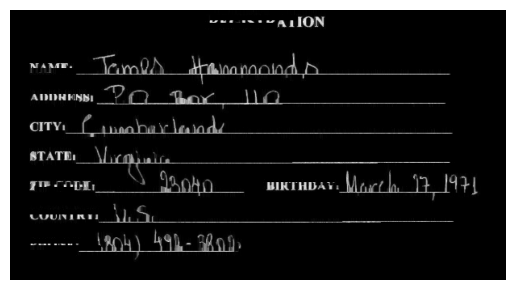

In [3]:
# Morphological opening with a 3x1 element
kernel = np.ones((2, 1), np.uint8)
opening = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening, cmap='binary')
plt.axis('off')
plt.show()